# 1. Motivation

### The Datasets
The motor vehicle collision database includes the date and time, location (as borough, street names, zip code and latitude and longitude coordinates), injuries and fatalities, vehicle number and types, and related factors for all collisions in New York City during **2015 and 2016**.<br>
The vehicle collision data was collected by the NYPD and published by NYC OpenData.

The second dataset used was the NYC Yellow Taxi Trips. The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

### Why this dataset?

The dataset just released 4 months ago, so its quite intresting to have an inshight on the latest traffic collision patterns in N.Y., and contains all the required features we need for the analysis.

Furthermore we included a second dataset, that of the yellow taxi trip records. What we used were the fields capturing pick-up and drop-off dates/times in order to make a comparison between the main traffic locations and those of the accidents.

### What was your goal for the end user's experience?
We target to enable the user to have an overview of the basic stats of traffic collisions, eg. number of accidents , deaths and injuries per factor of accident as well as the hour of the day that the accident occured.
We want to inform the users of the most dangerous combinations and help them be safer. Additionaly, we would like to find out, if possible, why accidents happen, which will lead to ways of prevention.
Using machine learning techniques we also let the user to estimate the most likely borough for an accident given the time, factor and type of vehicle. Using clustering we found out the cendroids of the accidents and traffic for 2,3 and 4 number of clusters respectively which are presented on our website. We did the same for the traffic. This way we will find out if there are areas where accidents happen while there is not much traffic.

# 2. Basic stats. Let's understand the dataset better

### Write about your choices in data cleaning and preprocessing
The data cleaning procedure included the clearance of outliers, of Null values and zero values. Outliers will raise errors when plotting the maps. Null and zero values would have made our results incorrect or misleading.

### Write a short section that discusses the dataset stats
The first thing that we investigated is which causes of accidents occur the most, as well as, the total amount of incidents. The most common factor is the drivers inattention. There is a huge difference with the runner up cause, failure to yield.<br>
Secondly, the number of deaths and injuries per category (PERSONS, PEDESTRIANS, CYCLISTS, MOTORISTS) was counted. Persons group seems to be the one that suffered the most deaths and injuries. What is interesting here is the fact that the difference becomes much smaller compared to the second category, motorists. Another interesting fact is that while there are more pedestrians killed than motorists, there are more motorists injured than pedestrians. The reasons for that are two. To begin with, it is very easy and common for a motorist to just lose his balance and fall causing him an injury thus increasing the number of motorists injuried. Furthermore, pedestrians are very vulnerable, meaning that if they are hit by a car the changes that they will get killed are increased.<br>
Thirdly, we investigated how the number of accidents are distributed during a day, namely what time most accidents take place.
We can see that there is an obvious peak at around 16:00-17:00 and a smaller one at around 8:00. The reason here is that there are more people moving around at that time, coming and going to work. It also makes sence that at 16:00 there are more accidents as people are tired and anxious to get back home. There is a peak that we can not really explain at 13:00 and is really intereting.
If we compare this with the respective graph of the taxi traffic, we can see the same peak in the morning but in the evening the peak in traffic seems to be happening a bit later and the duration to be longer. This means that while there is a correlation, it is not binding.

In [2]:
# Importing the necessary libraries for the analysis.
import pandas as pd #import library
data=pd.read_csv("database.csv") #reading the csv into dataframe
import matplotlib.pyplot as plt
%matplotlib inline
import geoplotlib
from geoplotlib.utils import BoundingBox
from geoplotlib.colors import ColorMap
from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydot
from sklearn.cluster import KMeans
import numpy as np
import csv # get the csv reader
import random
import json
from collections import Counter
from sklearn import tree
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
# Database Column names
print data.columns

Index([u'UNIQUE KEY', u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE',
       u'LONGITUDE', u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'PERSONS INJURED', u'PERSONS KILLED',
       u'PEDESTRIANS INJURED', u'PEDESTRIANS KILLED', u'CYCLISTS INJURED',
       u'CYCLISTS KILLED', u'MOTORISTS INJURED', u'MOTORISTS KILLED',
       u'VEHICLE 1 TYPE', u'VEHICLE 2 TYPE', u'VEHICLE 3 TYPE',
       u'VEHICLE 4 TYPE', u'VEHICLE 5 TYPE', u'VEHICLE 1 FACTOR',
       u'VEHICLE 2 FACTOR', u'VEHICLE 3 FACTOR', u'VEHICLE 4 FACTOR',
       u'VEHICLE 5 FACTOR'],
      dtype='object')


In [4]:
# Calculating the number of incidents.
dimensions=data.shape
print "The number of incidents are:",dimensions[0]

The number of incidents are: 477732


In [5]:
# Count the incidents per factor of accident.
FactorData=data.loc[(data['VEHICLE 1 FACTOR'] !="UNSPECIFIED")] # removing unspecified factors from data.
FactorData=FactorData['VEHICLE 1 FACTOR'].value_counts()

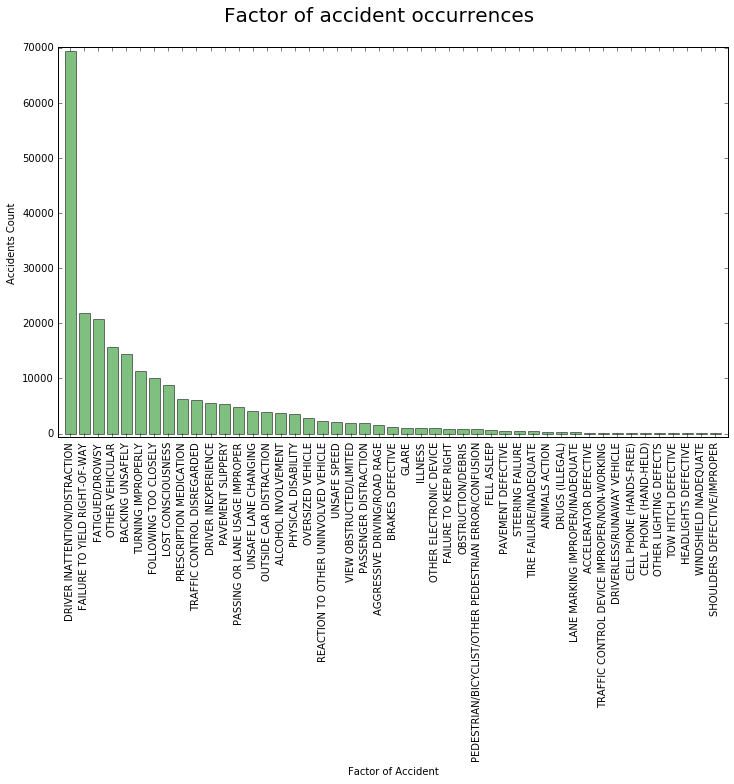

In [6]:
# plotting the factor of accidents and the number of incidents.
fig=plt.figure(figsize=(12,7))
plt.suptitle('Factor of accident occurrences ',fontsize=20)
plt.bar(range(47), FactorData, align='center', color="green", alpha=0.5)
plt.xticks(range(47),FactorData.index,rotation='vertical')
plt.margins(0.01) # adjust margins so we have 
plt.ylabel("Accidents Count")
plt.xlabel("Factor of Accident")
plt.savefig('foo.png',bbox_inches='tight')
plt.show()

In [7]:
# Counting the number of deaths and injuries per category. 
Fatality=data.filter(items=['PERSONS INJURED', 'PERSONS KILLED','PEDESTRIANS INJURED','PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED','MOTORISTS INJURED','MOTORISTS KILLED']).sum()
print Fatality.sort_values()
f=Fatality.sort_values()
f=f.tolist() # creating a list from the np ndarray

CYCLISTS KILLED            37
MOTORISTS KILLED          180
PEDESTRIANS KILLED        296
PERSONS KILLED            506
CYCLISTS INJURED        10414
PEDESTRIANS INJURED     24984
MOTORISTS INJURED       95828
PERSONS INJURED        118418
dtype: int64


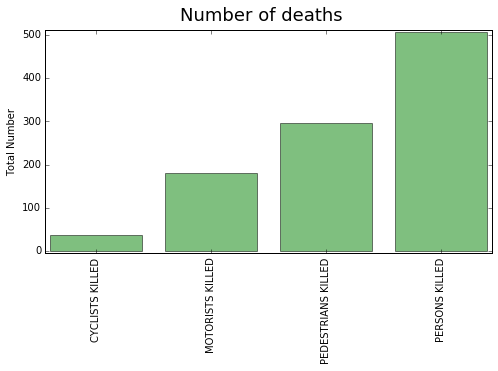

In [8]:
# Plotting the results.
plt.figure(figsize=(8,4))
plt.bar(range(4),f[0:4], align='center', color="green", alpha=0.5)
plt.suptitle('Number of deaths',fontsize=18)
plt.xticks(range(4), ['CYCLISTS KILLED', 'MOTORISTS KILLED','PEDESTRIANS KILLED','PERSONS KILLED'],rotation='vertical')
plt.margins(0.01) # adjust margins so we have 
plt.ylabel("Total Number")
plt.show()

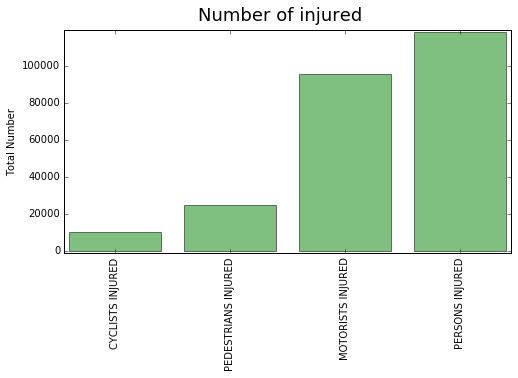

In [41]:
# Plotting the results.
plt.figure(figsize=(8,4))
plt.bar(range(4),f[4:], align='center', color="green", alpha=0.5)
plt.suptitle('Number of injured',fontsize=18)
plt.xticks(range(4), ['CYCLISTS INJURED','PEDESTRIANS INJURED','MOTORISTS INJURED','PERSONS INJURED'],rotation='vertical')
plt.margins(0.01) # adjust margins so we have 
plt.ylabel("Total Number")
plt.show()

In [98]:
# Create a function that returns the time
def getHour(s):
    return int(s.split(':')[0])

# Now create a new column named hour and store the values of the above function
data['Hour']= data['TIME'].apply(lambda x: getHour(x))

In [99]:
#create a dataframe with the accident occurencies per hour
dfHours = data.filter(items=['Hour']) 
dfHours=dfHours.apply(pd.value_counts)
dfHours.sort_index()

Hour
0   13525
1    7547
2    5807
3    4857
4    5730
5    6241
6   10024
7   13715
8   27092
9   26498
10  24395
11  25427
12  26653
13  27927
14  32750
15  29731
16  35532
17  34508
18  30598
19  24531
20  20299
21  16759
22  15372
23  12214

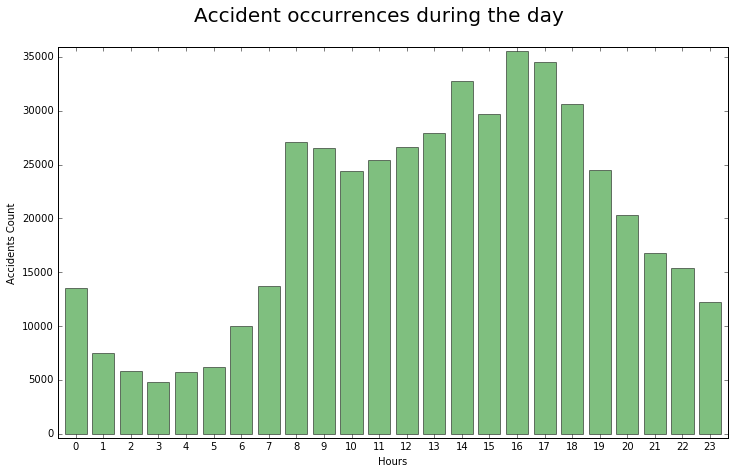

In [100]:
# Plotting the accidents count per Hour of the day.
fig=plt.figure(figsize=(12,7))
plt.suptitle('Accident occurrences during the day ',fontsize=20)

plt.bar(dfHours.index, dfHours["Hour"], align='center', color="green", alpha=0.5)
plt.xticks(dfHours.index,dfHours.index)
plt.margins(0.01) # adjust margins so we have 
plt.ylabel("Accidents Count")
plt.xlabel("Hours")
plt.show()

In [75]:
dataJanuary=pd.read_csv("1january.csv") #reading the csv into dataframedataJanuary=pd.read_csv("1january.csv") #reading the csv into dataframe

In [76]:
# Filtering the data
cleanJanuary=dataJanuary.loc[(dataJanuary['pickup_longitude'] < -72) &
                    (dataJanuary['pickup_longitude'] > -75) &
                    (dataJanuary['pickup_longitude'] is not None)&
                    (dataJanuary['pickup_latitude'] is not None)&
                    (dataJanuary['pickup_latitude'] != 0.0)&
                    (dataJanuary['dropoff_longitude'] < -72) &
                    (dataJanuary['dropoff_longitude'] > -75) &
                    (dataJanuary['dropoff_longitude'] is not None)&
                    (dataJanuary['dropoff_latitude'] is not None)&
                    (dataJanuary['dropoff_latitude'] != 0.0)]

In [101]:
# Create a function that returns the time
def getHourTaxi(s):
    return int((s.split(':')[0]).split(' ')[1])

# Now create a new column named hour and store the values of the above function
cleanJanuary['Hour']= cleanJanuary['pickup_datetime'].apply(lambda x: getHourTaxi(x))


#create a dataframe with the accident occurencies per hour
dfHoursTaxi = cleanJanuary.filter(items=['Hour']) 
dfHoursTaxi=dfHoursTaxi.apply(pd.value_counts)
dfHoursTaxi.sort_index()

C:\Users\nickzafi\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Hour
0   389241
1   295037
2   225190
3   166065
4   123183
5   109407
6   231806
7   397300
8   483198
9   483825
10  472759
11  494212
12  526348
13  522837
14  553216
15  554235
16  502260
17  581974
18  680478
19  671466
20  613864
21  597885
22  571414
23  473417

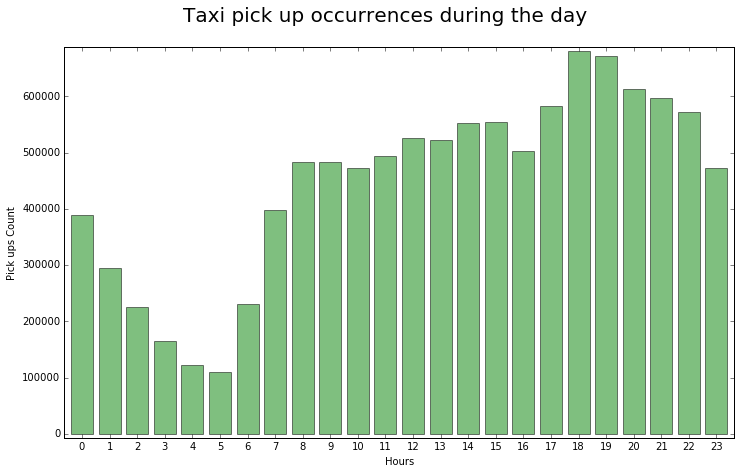

In [102]:
# Plotting the taxi traffic count per Hour of the day.
fig=plt.figure(figsize=(12,7))
plt.suptitle('Taxi pick up occurrences during the day ',fontsize=20)

plt.bar(dfHoursTaxi.index, dfHoursTaxi["Hour"], align='center', color="green", alpha=0.5)
plt.xticks(dfHoursTaxi.index,dfHoursTaxi.index)
plt.margins(0.01) # adjust margins so we have 
plt.ylabel("Pick ups Count")
plt.xlabel("Hours")
plt.show()

### Geoplotting
In this section we created 6 different maps depicting the coordinates that serious accidents happen. Those are the deaths and injuries for each category (PEDESTRIANS, CYCLISTS, MOTORISTS). What we would like to see is if they are relatively close. If they are not that would mean that different areas are dangerous for different people. If they are, that would mean that there are areas that are generally dangerous.<br>
As we can see from the maps bellow, while for the pedestrians and cyclists the center of injuries are the same, in the center of the city, for the motorists it is not. That is because more people are cycling and walking in the center because the distances are shorter.<br>
We can also observe which roads are dangerous to be on.<br>
Furthermore, if we compare the map of all the accidents with that of the traffic, we will observe that while the city center is very active in both maps, there are many other parts of the map that are far more active when it comes to accidents. Thus, while there is a correlation between traffic and accidents, there are some areas that seem to be dangerous with no apparent reason. This could be due to speeding, hard turns or unsignalized intersections. 

In [50]:
# Cleaning the data for plotting. Outliers and NaN values. 
dataForGeo=data.loc[(data['LONGITUDE'] < -72) &
                    (data['LONGITUDE'] > -75) &
                    (data['LONGITUDE'] is not None)&
                    (data['LATITUDE'] is not None)&
                    (data['LATITUDE'] != 0.0)]

In [51]:
east=max(dataForGeo["LONGITUDE"])
west=min(dataForGeo["LONGITUDE"])
south=max(dataForGeo["LATITUDE"])
north=min(dataForGeo["LATITUDE"])

In [52]:
geo_data_for_plotting = {"lat": dataForGeo["LATITUDE"],
                         "lon": dataForGeo["LONGITUDE"]}

In [53]:
# Map of all incidents
geoplotlib.kde(geo_data_for_plotting,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 5.3731908254315777e-08)
('max count:', 53.423341864672629)


In [165]:
geo_data_for_taxi = {"lat": list(cleanJanuary["pickup_latitude"])+list( cleanJanuary["dropoff_latitude"]) ,
                         "lon": list(cleanJanuary["pickup_longitude"])+list( cleanJanuary["dropoff_longitude"])}

In [166]:
# Map of taxi traffic
geoplotlib.kde(geo_data_for_taxi,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 0.00017154808680210719)
('max count:', 25918.613913974597)


In [54]:
dataforgeokilled=dataForGeo.loc[(dataForGeo['PEDESTRIANS KILLED'] > 0)]#at least 1 killed
geo_data_for_plotting1 = {"lat": dataforgeokilled["LATITUDE"],
                         "lon": dataforgeokilled["LONGITUDE"]}

In [55]:
# Map of PEDESTRIANS KILLED
geoplotlib.kde(geo_data_for_plotting1,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 1.7910636084771928e-08)
('max count:', 0.31831178348375949)


In [56]:
dataforgeoPedestriansInjured=dataForGeo.loc[(dataForGeo['PEDESTRIANS INJURED'] > 0)]#at least 1 injured

In [57]:
geo_data_for_plotting2 = {"lat": dataforgeoPedestriansInjured["LATITUDE"],
                         "lon": dataforgeoPedestriansInjured["LONGITUDE"]}

In [58]:
#Map of INJURED PEDESTRIANS
geoplotlib.kde(geo_data_for_plotting2,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 6.1102944489965766e-07)
('max count:', 3.1449872403794217)


In [59]:
dataforCycklistskilled=dataForGeo.loc[(dataForGeo['CYCLISTS KILLED'] > 0)]#at least 1 killed
geo_data_for_plotting3 = {"lat": dataforCycklistskilled["LATITUDE"],
                         "lon": dataforCycklistskilled["LONGITUDE"]}

In [60]:
#Map of CYCLISTS KILLED
geoplotlib.kde(geo_data_for_plotting3,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 1.7910636084771928e-08)
('max count:', 0.31831178348375949)


In [63]:
dataforCycklistsinjured=dataForGeo.loc[(dataForGeo['CYCLISTS INJURED'] > 0)]#at least 1 killed
geo_data_for_plotting4 = {"lat": dataforCycklistsinjured["LATITUDE"],
                         "lon": dataforCycklistsinjured["LONGITUDE"]}

In [64]:
# Map of CYCLISTS INJURED
geoplotlib.kde(geo_data_for_plotting4,1, cmap="hot")
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 1.7910636084771928e-08)
('max count:', 2.5434793794470538)


In [65]:
dataformotoristsinjured=dataForGeo.loc[(dataForGeo['MOTORISTS INJURED'] > 0)]#at least 1 killed
geo_data_for_plotting5 = {"lat": dataformotoristsinjured["LATITUDE"],
                         "lon": dataformotoristsinjured["LONGITUDE"]}

In [66]:
#Map of MOTORISTS INJURED
geoplotlib.kde(geo_data_for_plotting5,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 1.7910636084771928e-08)
('max count:', 7.8799481740739923)


In [67]:
dataformotoristskilled=dataForGeo.loc[(dataForGeo['MOTORISTS KILLED'] > 0)]#at least 1 killed
geo_data_for_plotting6 = {"lat": dataformotoristskilled["LATITUDE"],
                         "lon": dataformotoristskilled["LONGITUDE"]}

In [68]:
# Map of MOTORISTS KILLED
geoplotlib.kde(geo_data_for_plotting6,1)
bbox = BoundingBox(north=north, west=west, south=south, east=east)
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()
geoplotlib.show()

('smallest non-zero count', 3.9608856017521906e-05)
('max count:', 0.31831178348375949)


# 3. Theory. Which theoretical tools did you use?

## Machine learning

### Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.
We are using the decision tree and the kmeans machine learning techniques.<br>
We are going to use the desision tree classification to predict where accidents may occure. We believe that this is very important as people will try to avoid areas that might be dangerous for them, leading to a safer life.<br>
Furthermore with kmeans clustering we are trying to identify the centers of the traffic accidents as well as the centers of the taxi traffic. That will enables us to have an insight on the areas where accidents happen versus where most of the traffic is observed. Thus we will be able to tell if there is a stong correlation between those two elements. If there is none, we we will be able to conclude that some areas are simply more dangerous to travel within.


### Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?
The features that we used at first to feed the descision tree model were the time and the factor of the accident. The test and training data were randomly selected and splitted as 90% training and 10% for testing and cross validation was not used. 

### Explain the model performance. How did you measure it? Are your results what you expected?
The success ratio was 35.26%. Next we added one more feature, the type of vehicle, to see if our model's prediction rate will improve. It increased at 37.69%. This meant that this element is not very indicative. We expected that by having 3 features the model accurancy would be higher.

In [142]:
# Filtering the data
dataForTree=data.loc[(data['BOROUGH'] >"")&
                    (data['VEHICLE 1 FACTOR'] >"")&
                    (data['VEHICLE 1 FACTOR'] !="UNSPECIFIED")& 
                     (data['VEHICLE 1 TYPE'] !="UNKNOWN")&
                     (data['VEHICLE 1 TYPE'] > 0) &
                     (data['Hour'] >-1)&
                    (data['LATITUDE'] != 0.0)]

In [143]:
boroughs=dataForTree.filter(items=['BOROUGH'])
hours=dataForTree.filter(items=['Hour'])
factors=dataForTree.filter(items=['VEHICLE 1 FACTOR'])
vehicle=dataForTree.filter(items=['VEHICLE 1 TYPE'])
# Transforming dataframes to 1-d arrays
boroughs=np.ravel(boroughs)
hours=np.ravel(hours)
factors=np.ravel(factors)
vehicle=np.ravel(vehicle)

In [144]:
#Encoding the dataframe because desision tree library does not accept strings
le=preprocessing.LabelEncoder()
le.fit(boroughs)
EnBoroughs=le.transform(boroughs)

In [145]:
#Encoding the dataframe because desision tree library does not accept strings
le=preprocessing.LabelEncoder()
le.fit(factors)
EnFactor=le.transform(factors)

In [146]:
#Encoding the dataframe because desision tree library does not accept strings
le=preprocessing.LabelEncoder()
le.fit(vehicle)
EnVehicle=le.transform(vehicle)

In [147]:
#Stack the arrays of hours and encoded Factor.
EnHoFa=np.stack((hours, EnFactor), axis=-1)

In [148]:
# Creating the test and training sets, 90% as training.
X_train, X_test, y_train, y_test = train_test_split(EnHoFa,EnBoroughs, test_size=0.1, random_state=42)

In [149]:
#Training the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [150]:
results=clf.score(X_test,y_test)
print "Percentage of correct predictions is:", str(results*100)[:5],"%"

Percentage of correct predictions is: 35.26 %


#### We add a third feature that further increase the correct prediction

In [151]:
#Stack the arrays of hours, encoded Factor and Encoded Vehicle.
EnHoFaVe=np.stack((hours, EnFactor,EnVehicle), axis=-1)

In [152]:
# Creating the test and training sets, 90% as training.
X_train, X_test, y_train, y_test = train_test_split(EnHoFaVe,EnBoroughs, test_size=0.1, random_state=42)

In [153]:
#Training the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [154]:
results=clf.score(X_test,y_test)
print "Percentage of correct predictions is:", str(results*100)[:5],"%"

Percentage of correct predictions is: 37.67 %


In [155]:
# Create a mapping of our Encoded lists and pretty print it
import operator
import pprint
from prettytable import PrettyTable

MapBorough={}
MapFactor={}
MapHour={}
MapVehicle={}
for i,item in enumerate(boroughs):
    MapBorough[item]=EnBoroughs[i]

for i,item in enumerate(factors):
    MapFactor[item]=EnFactor[i]

for i,item in enumerate(vehicle):
    MapVehicle[item]=EnVehicle[i]

sorted_MapBorough = sorted(MapBorough.items(), key=operator.itemgetter(1))
sorted_MapFactor = sorted(MapFactor.items(), key=operator.itemgetter(1))
sorted_MapVehicle = sorted(MapVehicle.items(), key=operator.itemgetter(1))

x = PrettyTable()
x.field_names = ["Borough","Encoding"]
for i in sorted_MapBorough:
    x.add_row([i[0],i[1]])

x1= PrettyTable()
x1.field_names = ["Type","Encoding"]
for i in sorted_MapFactor:
    x1.add_row([i[0],i[1]])


x3= PrettyTable()
x3.field_names = ["Vehicle Type","Encoding"]
for i in sorted_MapVehicle:
    x3.add_row([i[0],i[1]])

print x
print x1   
print x3

+---------------+----------+
|    Borough    | Encoding |
+---------------+----------+
|     BRONX     |    0     |
|    BROOKLYN   |    1     |
|   MANHATTAN   |    2     |
|     QUEENS    |    3     |
| STATEN ISLAND |    4     |
+---------------+----------+
+-------------------------------------------------------+----------+
|                          Type                         | Encoding |
+-------------------------------------------------------+----------+
|                 ACCELERATOR DEFECTIVE                 |    0     |
|              AGGRESSIVE DRIVING/ROAD RAGE             |    1     |
|                  ALCOHOL INVOLVEMENT                  |    2     |
|                     ANIMALS ACTION                    |    3     |
|                    BACKING UNSAFELY                   |    4     |
|                    BRAKES DEFECTIVE                   |    5     |
|                 CELL PHONE (HAND-HELD)                |    6     |
|                CELL PHONE (HANDS-FREE)         

#### Let's try to predict the borough for the following scenario.

In [156]:
incident=[16,9,8] # At 16 o'clock, factor= Driver's inexperience, vehicle=passenger vehicle.
District=clf.predict_proba(incident)#making the predictions
SortDistrict=sorted(District[0])
print SortDistrict # Sort the list to find the 3 bigger percentages
print District[0] #print in order to match with the classes encoding and find the district through the table below
print clf.classes_

[0.085889570552147243, 0.085889570552147243, 0.22699386503067484, 0.2822085889570552, 0.31901840490797545]
[ 0.08588957  0.22699387  0.3190184   0.28220859  0.08588957]
[0 1 2 3 4]


The three more likely boroughs are: **MANHATTAN** with **31.9%**, **QUEENS** with **28.2%** and **BROOKLYN** with **22.7%**

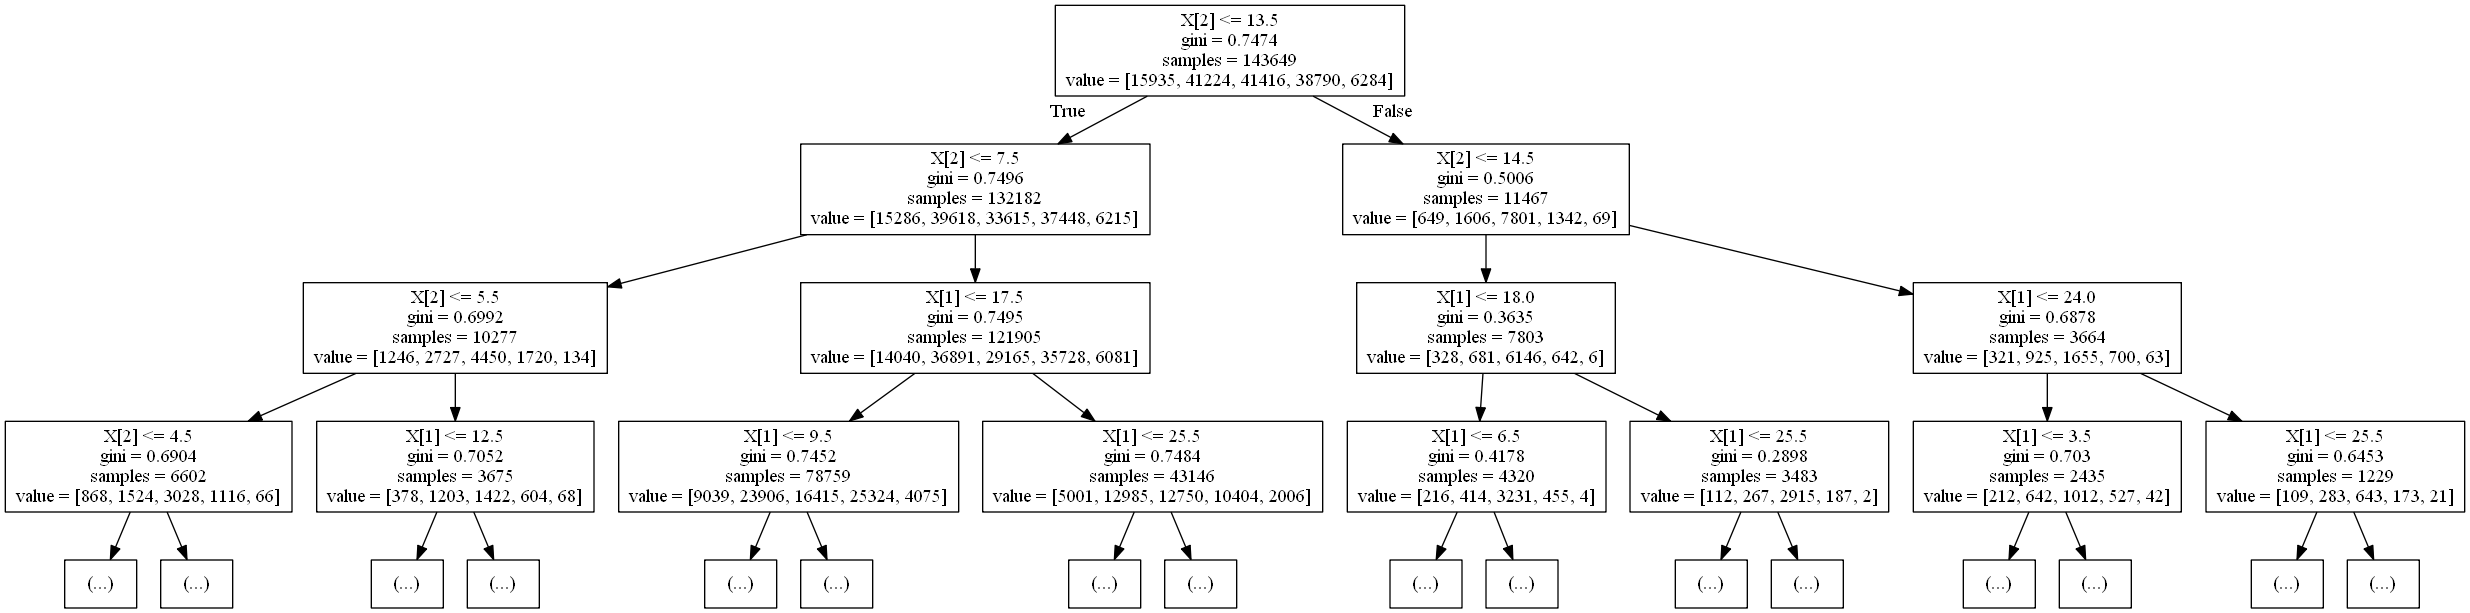

In [158]:
#ploting the desision tree
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,max_depth = 3)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Clustering

In [161]:
DataKmeans=dataForGeo.filter(items=['LATITUDE', 'LONGITUDE'])#filtering the dataset and save the coordinates
DataKmeans.head()

LATITUDE  LONGITUDE
0  40.751847 -73.787862
1  40.771289 -73.946693
2  40.689445 -73.955121
3  40.673845 -73.925080
5  40.656684 -73.929896

In [162]:
DataKmeansArray=np.array(DataKmeans)#turn into an array
DataKmeansArray

array([[ 40.7518471, -73.787862 ],
       [ 40.7712888, -73.9466928],
       [ 40.6894449, -73.9551212],
       ..., 
       [ 40.707077 , -73.954025 ],
       [ 40.884342 , -73.886765 ],
       [ 40.814037 , -73.948364 ]])

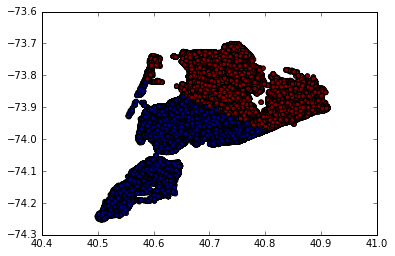

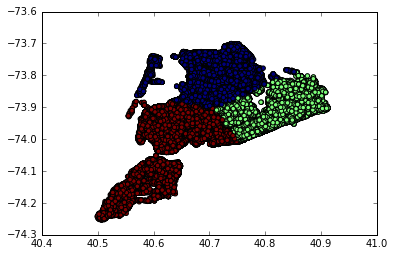

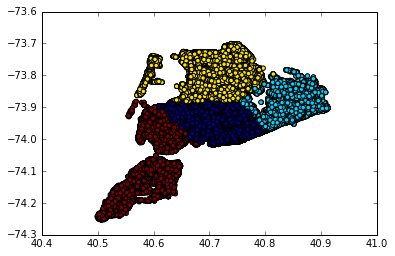

In [164]:
for i in range(2,5):#plot how the points would be distributed amongst different clusters. For 2,3 and 4 clusters
    kmeans = KMeans(n_clusters=i, random_state=0).fit_predict(DataKmeansArray)
    plt.scatter(DataKmeansArray[:, 0], DataKmeansArray[:, 1], c=kmeans)
    plt.show()

In [163]:
for i in range(2,5):#calculating the coordinates of the centroids of the clusters for 2,3 and 4 clusters
    kmeans2 = KMeans(n_clusters=i, random_state=0).fit(DataKmeansArray)
    print kmeans2.cluster_centers_

[[ 40.68228024 -73.97829684]
 [ 40.76961033 -73.85654579]]
[[ 40.71005628 -73.81021375]
 [ 40.80038405 -73.92503332]
 [ 40.65941137 -73.98314484]]
[[ 40.71723658 -73.95596584]
 [ 40.83597273 -73.89828425]
 [ 40.71085106 -73.80674147]
 [ 40.6089982  -74.02366847]]


# Taxi Dataset clustering

In [167]:
#Keeping both pick up and drop off coordinates as indicators of traffic
KMeansTaxiPickup=cleanJanuary.filter(items=['pickup_latitude', 'pickup_longitude'])
KMeansTaxiDropOff=cleanJanuary.filter(items=['dropoff_latitude', 'dropoff_longitude'])

In [168]:
#rename the columns and concat the coordinates data
KMeansTaxiDropOff=KMeansTaxiDropOff.rename(columns = {"dropoff_latitude":'pickup_latitude',"dropoff_longitude":"pickup_longitude"})
KMeansTaxi= pd.concat([KMeansTaxiPickup,KMeansTaxiDropOff],axis=0)

In [169]:
KMeansTaxiArray=np.array(KMeansTaxi) #turn into array

In [170]:
#we need array of array for the KMeans library
KMeansTaxiPickupArray=np.array(KMeansTaxiPickup)
KMeansTaxiPickupArray

array([[ 40.7347 , -73.99037],
       [ 40.72991, -73.98078],
       [ 40.67957, -73.98455],
       ..., 
       [ 40.72823, -73.99911],
       [ 40.72007, -73.98833],
       [ 40.72289, -73.98891]])

In [172]:
for i in range(2,5):#find the centroids for the traffic for 2,3 and 4 clusters
    kmeans4 = KMeans(n_clusters=i, random_state=0).fit(KMeansTaxiArray)
    print kmeans4.cluster_centers_

[[ 40.75299603 -73.97973089]
 [ 40.71801373 -73.8349104 ]]
[[ 40.77494712 -73.95960841]
 [ 40.73689813 -73.9904789 ]
 [ 40.66081824 -73.79051142]]
[[ 40.73272938 -73.99228448]
 [ 40.77216325 -73.88190392]
 [ 40.77138143 -73.96911881]
 [ 40.65220501 -73.78490798]]


In [ ]:
#If one wants to run this BE AWARE HUGE DATASET it will take time.
#see to which cluster each point belongs for 2,3 and 4 clusters.
#for i in range(2,5):
#    kmeansTraffic2 = KMeans(n_clusters=i, random_state=0).fit_predict(KMeansTaxiPickupArray)
#    plt.scatter(KMeansTaxiPickupArray[:, 0], KMeansTaxiPickupArray[:, 1], c=kmeansTraffic2)
#    plt.show()

# 4. Visualizations

### Explain the visualizations you've chosen.
As far as the visualizations are concerned, we chose an interactive d3 scatterplot that will allow the user to have an overview of the factors of accidents. The two axis correspond to the total number of accidents and the total number of deaths or injuries. When the user hover above the specific factor he gets more detailed info, the borough name with the most deaths and injuries and the exact count of the deaths and injuries at that specific borough.<br>

The second visualization is a geoplot of NY map where the user can see the centroids of the clustering both for accidents and traffic. He can toggle between the different number of clusters by clicking or hovering above the predefined buttons.

### Why are they right for the story you want to tell?
The scatter plot allow the user to see which is the correlation between the number of accidents and the number of death and injuries. To give an example if a factor has a large number of death and injuries but few total number of accidens that means that this factor is very threatening. On the other hand if a factor has a handfull of death and injuries and many occurances that would suggest it is not very fatal.<br>

The purpose of the geoplot is to give to the user the ability to directly compare the centroids of traffic and accidents. Thus the user will be able to tell if there is any correlation between traffic and accidents.

### Creating .csv file for the d3.js visualization
At these part we are extracting the needed data for the d3 scatter plot visualization.
These are VEHICLE 1 FACTOR,total Deaths And Injuries,Number of Accidents,BOROUGH and Total number of deaths and injuries in theat borough

In [88]:
# Retrieving data for scatter Plot
# removing unspecified factors from data and NaN values from boroughs.
DataScatter=data.loc[(data['VEHICLE 1 FACTOR'] !="UNSPECIFIED")&
                     (data['BOROUGH'] >"")]

DataScatter1=DataScatter.filter(items=['VEHICLE 1 FACTOR','BOROUGH','PERSONS INJURED', 'PERSONS KILLED','PEDESTRIANS INJURED','PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED','MOTORISTS INJURED','MOTORISTS KILLED'])

In [89]:
# defining a function to return the sum of all injuries and deaths.
def getTotalInjuries(injuries):
    return sum(injuries)
# adding a new Total coloumn with the sum of all injuries and deaths.
DataScatter1['Total'] = DataScatter1[['PERSONS INJURED', 'PERSONS KILLED','PEDESTRIANS INJURED','PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED','MOTORISTS INJURED','MOTORISTS KILLED']].apply(lambda x : getTotalInjuries(x),axis=1)
# Filter the 3 colouns we need.
DataScatter2=DataScatter1.filter(items=["VEHICLE 1 FACTOR",'BOROUGH',"Total"])
# Group by the datafames and finding the sum of all incidnets and the sum per borough.
DataScatter3=DataScatter2.groupby(["VEHICLE 1 FACTOR","BOROUGH"])["Total"].sum().reset_index(name="total").sort_values(by="total",ascending=0)
DataScatter4=DataScatter2.groupby(["VEHICLE 1 FACTOR"])["Total"].sum().reset_index(name="total").sort_values(by="total",ascending=0)

In [90]:
# Cleaning the Dataframe for the total amount of accidents per Borough,
# reseting the index and renaming the columns. Getting it ready for concat.
BoroughTotal=DataScatter3.drop_duplicates("VEHICLE 1 FACTOR")
BoroughTotal=BoroughTotal.reset_index(drop=True)
BoroughTotal=BoroughTotal.sort_values("VEHICLE 1 FACTOR").reset_index(drop=True)
BoroughTotal.rename(columns={"VEHICLE 1 FACTOR":"Vehicle factor","total":"boroughTotal"},inplace=True)

In [91]:
# Cleaning the Dataframe for the total amount of accidents per factor of the accident,
# reseting the index and renaming the columns. Getting it ready for concat.
DataScatter4=DataScatter4.reset_index(drop=True) #reseting index 
DataScatter4=DataScatter4.sort_values("VEHICLE 1 FACTOR").reset_index(drop=True)

TotalIncidents=DataScatter1['VEHICLE 1 FACTOR'].value_counts().reset_index()
TotalIncidents=pd.DataFrame(TotalIncidents) # Series to dataframe
TotalIncidents.rename(index=str, columns={"index": "VEHICLE FACTOR", "VEHICLE 1 FACTOR": "NumberAccidents"},inplace=True)
TotalIncidents=TotalIncidents.sort_values("VEHICLE FACTOR").reset_index(drop=True)

In [92]:
#Concating the Dataframes so we end up with a dataframe containing the Vehicle Factor, 
#Total Incidents, Total Deaths&Injuries, Borough with most Deaths&Injuries and the total number of Deaths&Injuries
#in that Borough.
#Extracting the Dataframe to csv file.
frames=[DataScatter4,TotalIncidents,BoroughTotal]
FinalDataScatter=pd.concat(frames,axis=1)
FinalDataScatter.drop("VEHICLE FACTOR",1, inplace=True)
FinalDataScatter.drop("Vehicle factor",1, inplace=True)
FinalDataScatter.rename(columns={"total":"totalDeathsAndInjuries"},inplace=True)
FinalDataScatter=FinalDataScatter.sort_values("NumberAccidents",ascending=0).reset_index(drop=True)
FinalDataScatter.to_csv('ScatterData.csv')

# 5. Discussion. Think critically about your creation

### What went well?
The exploration of the data was quite successful. We were able to understand better why accidents occur, how they are spread in a day and across New York, make correlations between accidents and traffic, count the number of accidents and how threating a factor is and many more. Thus we were able to understand why accidents happen.

### What is still missing? What could be improved? Why?
While we had a good feedback on why accidents happen, we still miss more data. It would be useful if we could use a dataset that would describe the roads of New York, where intersections and traffic lights are, were people speed and more. This way we would be able to have more suggestion on how to prevent accidents.

Another thing that could be improve is the desision tree predictions. We would like to be able to feed the model with more feaures in order to be able to give better results.

Finally it would also be interesting if we would be able to process the taxi data for more months that would give us better understanding of the traffic centers.